# The Oxford AstraZeneca dilemma

The Oxford-AstraZeneca (OxAZ) vaccine was the first for which we had a full
published and peer-reviewed paper on the results of the phase 3 clinical trial.

Phase 3 trials assess whether the vaccine is effective for preventing
infection.

There was an odd aspect to the OxAZ trial, where a proportion of the
participants accidentally got a low first dose of the vaccine.  The data later
suggested that giving this lower dose made the vaccine more effective.

Here we will analyze the data from the OxAZ trial, and consider how confident
we can be in this odd finding.


## Getting started

In [1]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
%matplotlib inline

# The OKpy testing system.
from client.api.notebook import Notebook
ok = Notebook('oxford_astrazeneca.ok')

Assignment: oxford astrazenica
OK, version v1.18.1



## The trial data

We are looking at the data from the [Oxford-Astrazeneca vaccine trial results
paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)32661-1/)

There were various arms of the study.  Here we are looking at the UK arm of
the study called "COV002" in the paper.

Each arm had two groups.  One group got the new Coronavirus vaccine - we will
call that the "Covax" group.  The other "Control" group got a control
injection, that did not have the Coronavirus vaccine.  In fact, for the
studies below, the control injection was a vaccine against an infection that
causes meningitis.

In each group, the subjects got two injections of their allocated type
("Covax" or "Control").  The paper calls the first and second injections the
"priming" and "booster" doses, respectively.

The planned Standard Dose (SD) of "Covax" was 50 billion viral particles.

In fact, due to a mistake in the manufacturing and measurement process, some
of the participants in the "COV002" arm got a priming dose that was about half
the standard dose (SD);  the paper refers to this as the Low Dose (LD)
injection.

This meant that the COV002 arm became two arms, according to their first
(priming) dose:

1. LD priming / SD booster - "LD/SD" in the paper; we will call this "LD" for
   short.
2. SD priming / SD booster - "SD/SD"; "SD" for short.

For various reasons, the LD group had a median time between priming and
booster dose of 84 days, compared to a median of 69 days in the SD group.

The interim analysis in the paper reports the number of symptomatic COVID-19
cases in each group that occurred at least 14 days after the booster (second)
injection.

From data in table 2 of the paper, participants in the LD group had an average
of 53.4 days of follow up, compared to 40.5 days in the SD group.

Here are the data derived from table 2 of the paper:

In [2]:
# Run this cell.
ox_vax = pd.read_csv('ox_astra_cov002.csv')
ox_vax

,Dose,Group,N,Cases
0,LD,Control,1374,30
1,LD,Covax,1367,3
2,SD,Control,2430,38
3,SD,Covax,2377,15


The `N` column has the number of participants in the given Dose / Group, and
`Cases` has the number of COVID-19 cases that occurred 14 days or more after
the booster dose.

Calculate the proportion of *all* participants that got COVID-19.

*Hint* : consider the `sum` method of the data frame.

In [3]:
prop_covid = ox_vax['Cases'].sum() / ox_vax['N'].sum()
prop_covid

0.011393746687864335

In [4]:
_ = ok.grade('q_prop_covid')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Make a function called `calc_prop_cases` that accepts a data frame like
`ox_vax`, and returns the total number of `Cases`, divided by the total number
in `N`. This is the proportion of cases in the group, for the given data
frame.

A "data frame like `ox_vax`" is a data frame that has columns `N` and `Cases`
with the same meaning as for the `ox_vax` data frame.

*Hint*: be very careful to use the data frame *like* `ox_vax` and not `ox_vax`
itself inside your function.

In [5]:
def calc_prop_cases(df):
    return df['Cases'].sum() / df['N'].sum()

In [6]:
# Check this function returns the same value as you calculated above, when
# called on the whole table.
calc_prop_cases(ox_vax)

0.011393746687864335

In [7]:
_ = ok.grade('q_calc_prop_cases')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed



One way of calculating the vaccine efficiency, it to calculate the drop in the
risk of getting COVID-19 in the vaccine group, compared to the control.

As you will see from the paper, we first calculate the *relative risk* (RR) of
getting COVID-19 after the vaccine.  The RR is the *proportion* of people
getting COVID-19 *after the vaccine* divided by the proportion of people
getting COVID-19 *after the control*.

Efficiency is 1 minus the relative risk (RR).

*Hint* : You might want to use your function above.

*Hint 2* : You will get a similar, but different number from the paper.  The
paper is using some fancy adjustments for patient age and for number of days
follow-up.

In [8]:
vax_eff = 1 - calc_prop_cases(ox_vax[ox_vax['Group']=='Covax']) / calc_prop_cases(ox_vax[ox_vax['Group']=='Control'])
vax_eff

0.731052036199095

In [9]:
_ = ok.grade('q_vax_eff')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now make a function called `calc_efficiency` that returns the efficiency from
a data frame like `ox_vax`:

In [10]:
def calc_efficiency(df):
    return 1 - calc_prop_cases(df[df['Group']=='Covax']) / calc_prop_cases(df[df['Group']=='Control'])

Check you get the same answer for the full data frame, as you calculated
above:

In [11]:
# Run this cell, check you get the same answer as previously.
calc_efficiency(ox_vax)

0.731052036199095

In [12]:
_ = ok.grade('q_calc_efficiency')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



In [41]:
ox_vax

,Dose,Group,N,Cases
0,LD,Control,1374,30
1,LD,Covax,1367,3
2,SD,Control,2430,38
3,SD,Covax,2377,15


We are getting closer to our question of interest - does the LD dose arm show
greater vaccine efficiency than the SD dose arm?

Calculate the efficiency for the LD group; call this `ld_vax_eff`. Calculte
the efficiency of the SD group; call this `sd_vax_eff`. Then subtract the SD
from the LD efficiency to get an *efficiency difference*. Call this
`vax_eff_diff`.

In [13]:
ld_vax_eff = calc_efficiency(ox_vax[ox_vax['Dose']=='LD'])
sd_vax_eff = calc_efficiency(ox_vax[ox_vax['Dose']=='SD'])
vax_eff_diff = ld_vax_eff - sd_vax_eff
print('LD efficiency', ld_vax_eff)
print('SD efficiency', sd_vax_eff)
print('Efficiency difference', vax_eff_diff)

LD efficiency 0.899487929773226
SD efficiency 0.5964617053782963
Efficiency difference 0.30302622439492966


In [14]:
_ = ok.grade('q_vax_eff_diff')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



You'll see similar, but different estimates in the paper.   The difference
looks fairly convincing, but our question, as ever, is whether these
differences could have come about *as a result of random sampling*.

Next make a function that called `calc_ld_sd_ediff` that accepts a data frame
like `ox_vax` as an argument, and returns the difference in efficiency for the
'LD' and 'SD' groups.

In [15]:
def calc_ld_sd_ediff(df):
    ld_vax_eff = calc_efficiency(df[df['Dose']=='LD'])
    sd_vax_eff = calc_efficiency(df[df['Dose']=='SD'])
    return ld_vax_eff - sd_vax_eff

Check you get the same difference from this function as you did from your
previous calculation.

In [16]:
# Run this cell, check you get the same answer as previously.
calc_ld_sd_ediff(ox_vax)

0.30302622439492966

In [17]:
_ = ok.grade('q_calc_ld_sd_ediff')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



Now we need to think about whether the result could have come about by random
sampling.

In order to do this, we first make a table that re-creates the data on the
individual participants to which the `ox_vax` data frame refers.

We can do this because we know the number of participants in each *cell* of
the study.  One *cell* refers to an unique combination of the "LD" / "SD"
label and the "Covax" / "Control" label.  For example, the first cell is "LD"
with "Control". We know from the data frame, that there are 1374 participants
in this cell, of which 30 caught COVID-19.  We can reconstruct the individual
patients for this cell by making 1374 rows, each with a "Dose" label of "LD",
and a "Group" label of "Control".  The last column will be "Case", which is
Boolean (True or False), where True corresponds to a subject who got COVID-19,
and False to a subject who did not.   So, for this cell, we will have 1374 - 30
= 1344 rows with False in the "Case" column, and 30 subjects with True in the
"Case" column.

The first five rows of the data frame will look like this:

In [18]:
# What the first five rows will look like.
person_start = pd.DataFrame()
person_start['Dose'] = np.repeat(['LD'], [5])
person_start['Group'] = np.repeat(['Control'], [5])
person_start['Case'] = np.repeat(['False'], [5])
person_start

,Dose,Group,Case
0,LD,Control,False
1,LD,Control,False
2,LD,Control,False
3,LD,Control,False
4,LD,Control,False


The trick of course, is to do this for all four cells, so we have a new data
frame with 1374 + 1367 + 2430 + 2377 = 7548 rows, one for each participant in
the whole COV002 study.

That is what you will do next.

Here we get you started, by making the first column of the data frame:

In [19]:
person_df = pd.DataFrame()
n_per_cell = np.array(ox_vax['N'])
person_df['Dose'] = np.repeat(['LD', 'LD', 'SD', 'SD'], n_per_cell)
# Show the first five rows
person_df.head()

,Dose
0,LD
1,LD
2,LD
3,LD
4,LD


Now your turn.  Make the contents of the "Group" column and put that column into the `person_df` data frame.

In [20]:
person_df['Group'] = np.repeat(['Control', 'Covax', \
                                'Control', 'Covax'], n_per_cell)# Show the first five rows so far.
person_df.head()

,Dose,Group
0,LD,Control
1,LD,Control
2,LD,Control
3,LD,Control
4,LD,Control


In [21]:
_ = ok.grade('q_person_df_group')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



Next we generate the False, True values for the "Cases" column.

We suggest you use `np.repeat` for this.  As you know, the first argument to `np.repeat` is a sequence (such as a list) of things that will be repeated.  The second argument is the number of repeats for each element.

We are going to repeat False 1374 - 30 = 1344 times, then True 30 times, and so
on.  Here we are trying to help you by preparing the first argument for `np.repeat` - the False and True values:

In [22]:
# Run this cell.
# "Case" will be False for non-case, True for case.
# Start with all False
to_repeat = np.repeat([False], len(n_per_cell) * 2)
# Set every other value, from the second, to True
to_repeat[1:len(to_repeat):2] = True
# Note that we can do the same thing with this short-cut.
to_repeat[1::2] = True
# Show the result
to_repeat

array([False,  True, False,  True, False,  True, False,  True])

Your job is to prepare the second argument to `np.repeat`, the number of
repeats, then use these arguments to fill in the "Case" column of `person_df`,
to reconstruct the participants in the trial.

*Hint*: be careful, your `repeat_nos` array below has to be of integer type,
not float type, because the number of repeats has to be an integer.  It starts
off that way, if you run the code we give you below.

In [23]:
# Start with an integer array of zeros, of the right length.
repeat_nos = np.repeat([0], len(to_repeat))
case_num = ox_vax['Cases']
nocase_num = ox_vax['N'] - ox_vax['Cases']
repeat_num = np.zeros(len(to_repeat))
repeat_num[::2] = nocase_num
repeat_num[1::2] = case_num
repeat_num = repeat_num.astype(np.int64)
person_df['Case'] = np.repeat(to_repeat, repeat_num)# Show the first five rows so far.
# Show the first five rows.
person_df.head()

,Dose,Group,Case
0,LD,Control,False
1,LD,Control,False
2,LD,Control,False
3,LD,Control,False
4,LD,Control,False


In [24]:
_ = ok.grade('q_person_df_with_case')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We'd like to check whether this table really does lead to the same counts for
total numbers in each cell ("N") and the number of cases in each cell
("Cases"), as we had in the original.  Here we use some Pandas magic that we
cover next term.

In [25]:
# Make a thing that knows how to "group" the rows "by" the pairs of labels in
# "Dose" and "Group".
grouped = person_df.groupby(['Dose', 'Group'])
# Aggregate within these groups, by
# * counting the number of rows
#  (put this value into the column "N")
# * counting the number of True values in the "Case" column
#  (put this value into the column "Cases")
aggregated = grouped.agg(N=('Case', len),
                         Cases=('Case', np.count_nonzero))
# Drop the fancy index (row labels) to make an ordinary data frame.
tabulated = aggregated.reset_index()
tabulated

,Dose,Group,N,Cases
0,LD,Control,1374,30
1,LD,Covax,1367,3
2,SD,Control,2430,38
3,SD,Covax,2377,15


Make a function to do the same work.  It operates on a data frame like
`person_df` above.

In [26]:
def cases_to_counts(full_df):
    """ Calculate "N" and "Cases" for "Dose" and "Group" cells of "full_df"
    """
    return full_df.groupby(['Dose', 'Group']).agg(
        N=('Case', len),
        Cases=('Case', np.count_nonzero)).reset_index()

Check the function returns the original table.

In [27]:
# This should return values identical to the original "ox_vax" data frame.
cases_to_counts(person_df)

,Dose,Group,N,Cases
0,LD,Control,1374,30
1,LD,Covax,1367,3
2,SD,Control,2430,38
3,SD,Covax,2377,15


Actually check the result is equal to the original table.

In [28]:
# This should should evaluate to (and show) True.
cases_to_counts(person_df).equals(ox_vax)

True

How we have `person_df` we can estimate the spread of the efficiency
differences under random sampling.

Let us formulate the null (ideal) world as - there is no real difference in the efficiency of the "LD" or "SD" doses.

In such a world, the current "LD" and "SD" labels would be arbitrary.

We can simulate what a sample would look like in such a world by taking a copy
of the real `person_df` data frame, and doing a random permutation of the
"Dose" labels:

In [29]:
fake_df = person_df.copy()
fake_df['Dose'] = np.random.permutation(person_df['Dose'])
fake_df.head()

,Dose,Group,Case
0,SD,Control,False
1,SD,Control,False
2,LD,Control,False
3,LD,Control,False
4,SD,Control,False


`fake_df` is an example data frame drawn from the ideal (null) world.

Try making 1000 such samples, and calculating the efficiency difference between the "LD" and "SD" doses for each one.  Record these fake differences in an array `fake_ediffs`.

*Hint*: take 1000 samples, not more, otherwise your code will take too long to
run.

In [30]:
n_iters = 1000
fake_ediffs = np.zeros(n_iters)
for i in range(n_iters):
    fake_df['Dose'] = np.random.permutation(person_df['Dose'])
    fake_ediffs[i] = calc_ld_sd_ediff(cases_to_counts(fake_df))
# Show the first 10 efficiency differences.
fake_ediffs[:10]

array([-0.04596196, -0.08190374,  0.04583019,  0.21436387,  0.02272721,
       -0.1751154 ,  0.06512902, -0.09166071, -0.09375932,  0.16114672])

In [40]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [31]:
_ = ok.grade('q_fake_ediffs')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



For your insight, show a histogram of the `fake_ediffs`.

<AxesSubplot:ylabel='Count'>

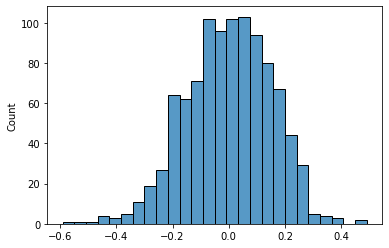

In [39]:
#- Histogram of eff_diffs
import seaborn as sns
sns.histplot(fake_ediffs)

Calculate the proportion of efficiency differences in this null (ideal) world that are greater than or equal to one we observed in the trial.

In [33]:
prop_ediff_ge = np.count_nonzero(fake_ediffs >= vax_eff_diff)/ len(fake_ediffs)
# Show the result
prop_ediff_ge

0.009

In [34]:
_ = ok.grade('q_prop_ediff_ge')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Based on your analysis here, and on your reading of the paper, would you
recommend that the UK go straight to using the LD/SD regimen for the OxAZ
vaccine, or would you recommend the SD/SD regimen, or a mixture?  Give your
reasons.

NB - this answer counts for four times as many points are each of the previous
answers.

<mark> <font size=4> I would recommend UK got straight to using the LD/SD regimen. If we set the significance level $ \alpha=0.05 $, according to the result fo the permutation test, we can reject the null hypothesis which states that there is no difference in efficency between LD group and SD group. The result showed a significantly higher level of efficiency in LD/SD group than SD/SD group, this means LD/SD regimen is better choice from a statistical point of view </mark> </font>

## Done.

Congratulations, you're done with the assignment!  Be sure to:

- **run all the tests** (the next cell has a shortcut for that).
- **Save and Checkpoint** from the `File` menu.
- Finally, **restart** the kernel for this notebook, and **run all the cells**,
  to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any
  problems, go back and fix them, save the notebook, and restart / run
  all again, before submitting.  When you do this, you make sure that
  we, your humble markers, will be able to mark your notebook.

In [35]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbbb55b6-0c6b-4399-abdf-84be2a641df8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>